In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import nltk
from datetime import datetime
nltk.download('punkt')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.append('r')

[nltk_data] Downloading package punkt to /home/cristina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cristina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
plt.rcParams["figure.figsize"] = (10, 8)

In [3]:
data = pd.read_csv("../data/interim/data.csv")
data.head()

,text,datetime,category,label
0,Chargista mais famoso do país aconselha Moro: ...,2017-06-11,politica,fake
1,"Dilma se irrita e confessa crime: "" Fiz porque...",25/12/2016,politica,fake
2,Quem é o cidadão que telefonou para o juiz Sér...,18/04/2016,politica,fake
3,Putin revela porque não se aproxima da Rainha ...,05/04/2016,politica,fake
4,Invertendo os papéis! Defesa de Lula vai ao ST...,29/08/2016,sociedade_cotidiano,fake


## Processamento dos dados

1. Tratamento das datas

In [4]:
data["date"] = data["datetime"].apply(lambda x :x.replace(" de ", "/"))

In [5]:
data["date"] = data["date"].apply(lambda x :x.replace("-", "/"))

In [6]:
mes = {
    "janeiro": '01',
    "fevereiro": '02',
    "março": '03',
    "abril": '04',
    "maio": '05',
    "junho": '06',
    "julho": '07',
    "agosto": '08',
    "setembro": '09',
    "outubro": '10',
    "novembro": '11',
    "dezembro": '12',
}

In [7]:
datas = []
for i in data.date:
    d = i.split('/')
    if d[1] in mes:
        d[1] = mes[d[1]]
    datas.append('/'.join(d))
len(datas)

7200

In [8]:
data["date"] = datas

In [9]:
data.date

0             2017/06/11
1             25/12/2016
2             18/04/2016
3             05/04/2016
4             29/08/2016
              ...       
7195    01/08/2017 19h41
7196    12/10/2017 16h23
7197            9/1/2018
7198    09/01/2017 06h00
7199    23/08/2017 14h46
Name: date, Length: 7200, dtype: object

In [10]:
certas = []

for k,v in enumerate(data.date):
    try:
        certas.append(pd.to_datetime(pd.Series(v)).to_string().split()[1])
    except:
        data.drop(index=k, inplace=True)


/tmp/ipykernel_16518/3656289709.py:5: UserWarning: Parsing '25/12/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  certas.append(pd.to_datetime(pd.Series(v)).to_string().split()[1])
/tmp/ipykernel_16518/3656289709.py:5: UserWarning: Parsing '18/04/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  certas.append(pd.to_datetime(pd.Series(v)).to_string().split()[1])
/tmp/ipykernel_16518/3656289709.py:5: UserWarning: Parsing '29/08/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  certas.append(pd.to_datetime(pd.Series(v)).to_string().split()[1])
/tmp/ipykernel_16518/3656289709.py:5: UserWarning: Parsing '14/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  certas.append(pd.to_datetime(pd.Series(v)).to_string().split()[1])
/tmp/ipykernel_16518/3656289709.py:5: Us

In [11]:
data['date'] = ['/'.join(i.split('-')[::-1]) for i in certas]
data.date

0       11/06/2017
1       25/12/2016
2       18/04/2016
3       04/05/2016
4       29/08/2016
           ...    
7195    08/01/2017
7196    10/12/2017
7197    01/09/2018
7198    01/09/2017
7199    23/08/2017
Name: date, Length: 7197, dtype: object

In [12]:
data['date_new'] = data['date'].astype({'date': 'datetime64[ns]'})

/home/cristina/.cache/pypoetry/virtualenvs/src-tsUqGJ47-py3.8/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1163: UserWarning: Parsing '25/12/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
/home/cristina/.cache/pypoetry/virtualenvs/src-tsUqGJ47-py3.8/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1163: UserWarning: Parsing '18/04/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
/home/cristina/.cache/pypoetry/virtualenvs/src-tsUqGJ47-py3.8/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1163: UserWarning: Parsing '29/08/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  to_datetime(arr).values,
/home/cristina/.cache/pypoetry/virtualenvs/src-tsUqGJ47-py3.8/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1163: UserWarning: Parsing '14/10/

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   text      7197 non-null   object        
 1   datetime  7197 non-null   object        
 2   category  7197 non-null   object        
 3   label     7197 non-null   object        
 4   date      7197 non-null   object        
 5   date_new  7197 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 393.6+ KB


In [14]:
data['date_new']

0      2017-11-06
1      2016-12-25
2      2016-04-18
3      2016-04-05
4      2016-08-29
          ...    
7195   2017-08-01
7196   2017-10-12
7197   2018-01-09
7198   2017-01-09
7199   2017-08-23
Name: date_new, Length: 7197, dtype: datetime64[ns]

2. Tratamento dos textos

In [15]:
def remove_stopword(old):
    retorno= ""
    palavras = nltk.word_tokenize(old)
    nova = [palavra for palavra in palavras if palavra not in stopwords]
    retorno= ' '.join(nova)
    return retorno

In [16]:
data["clean_text"] = data["text"].apply(lambda x : x.lower())

In [17]:
data["clean_text"] = data["clean_text"].apply(lambda x : re.sub('[^\w\s]', '', x))

In [18]:
data["clean_text"] = data["clean_text"].apply(lambda x: remove_stopword(x))

## Análise Exploratória

In [19]:
fake = data[data["label"]=="fake"]
true = data[data["label"]=="true"]

In [20]:
# quantidade de true news por mês
group_date_true = true.groupby('date_new')['label'].count().reset_index()
df_true_label = group_date_true.resample('M', on='date_new').sum().reset_index().rename(columns = {'date_new':'date', 'label':'count_label'})
df_true_label["mes"] = df_true_label['date'].dt.month
df_true_label

,date,count_label,mes
0,2009-06-30,1,6
1,2009-07-31,0,7
2,2009-08-31,0,8
3,2009-09-30,1,9
4,2009-10-31,1,10
...,...,...,...
105,2018-03-31,498,3
106,2018-04-30,0,4
107,2018-05-31,0,5
108,2018-06-30,0,6


In [21]:
# quantidade de fake news por mês
group_date_fake = fake.groupby('date_new')['label'].count().reset_index()
df_fake_label = group_date_fake.resample('M', on='date_new').sum().reset_index().rename(columns = {'date_new':'date', 'label':'count_label'})
df_fake_label["mes"] = df_fake_label['date'].dt.month
df_fake_label

,date,count_label,mes
0,2012-09-30,1,9
1,2012-10-31,0,10
2,2012-11-30,0,11
3,2012-12-31,0,12
4,2013-01-31,0,1
...,...,...,...
61,2017-10-31,145,10
62,2017-11-30,78,11
63,2017-12-31,74,12
64,2018-01-31,155,1


In [22]:
sns.set_style("whitegrid")

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


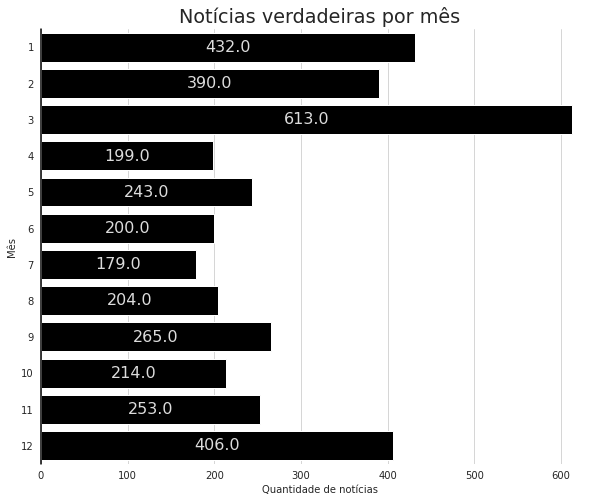

In [23]:
plt.subplots(figsize=(10, 8))
mlp.rc('font', family = 'Arial', size=16)
ax = sns.barplot(x="count_label", y="mes", data=df_true_label.groupby('mes').sum().reset_index(),
                hue_order="mes", orient='h', color='black')
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='gainsboro'
)
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)
plt.title("Notícias verdadeiras por mês")
plt.ylabel('Mês')
plt.xlabel('Quantidade de notícias')
plt.show();

Gráfico 1

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


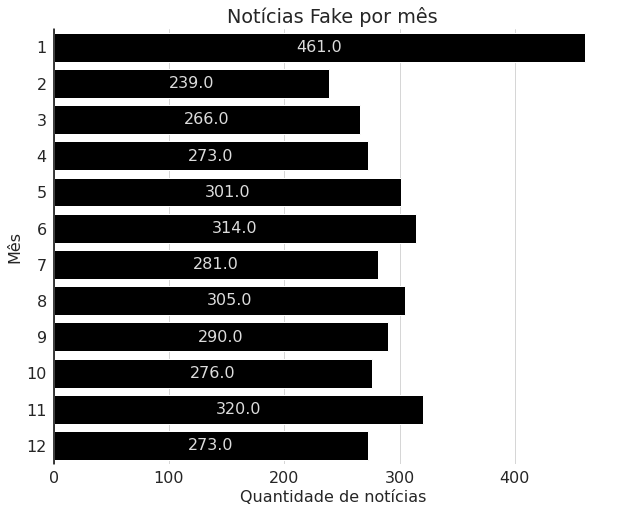

In [24]:
plt.subplots(figsize=(10, 8))
mlp.rc('font', family = 'Arial', size=16)
ax = sns.barplot(x="count_label", y="mes", data=df_fake_label.groupby('mes').sum().reset_index(),
                hue_order="mes", orient='h', color='black')
ax.set(frame_on=False)
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='gainsboro'
)
ax.axvline(0, color="k", clip_on=False)
plt.title("Notícias Fake por mês")
plt.ylabel('Mês')
plt.xlabel('Quantidade de notícias')
plt.show();

Gráfico 2

Nesses gráficos, temos a quantidade de true (gráfico 1) e fake (gráfico 2) somados por meses no intervalo de todos os anos.

In [25]:
group_date_true_y = true.groupby('date_new')['label'].count()
df_true_label_y = group_date_true_y.resample('Y').sum().reset_index().rename(columns = {'date_new':'date', 'label':'count_label'})
df_true_label_y['ano'] = df_true_label_y['date'].dt.year
df_true_label_y

,date,count_label,ano
0,2009-12-31,3,2009
1,2010-12-31,6,2010
2,2011-12-31,5,2011
3,2012-12-31,9,2012
4,2013-12-31,5,2013
5,2014-12-31,10,2014
6,2015-12-31,40,2015
7,2016-12-31,278,2016
8,2017-12-31,2103,2017
9,2018-12-31,1139,2018


In [26]:
group_date_fake_y = fake.groupby('date_new')['label'].count()
df_fake_label_y = group_date_fake_y.resample('Y').sum().reset_index().rename(columns = {'date_new':'date', 'label':'count_label'})
df_fake_label_y['ano'] = df_fake_label_y['date'].dt.year
df_fake_label_y

,date,count_label,ano
0,2012-12-31,1,2012
1,2013-12-31,0,2013
2,2014-12-31,0,2014
3,2015-12-31,235,2015
4,2016-12-31,1586,2016
5,2017-12-31,1608,2017
6,2018-12-31,169,2018


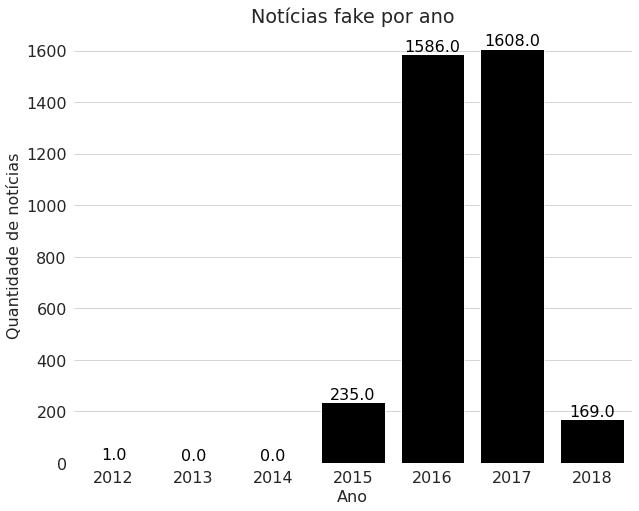

In [27]:
plt.subplots(figsize=(10, 8))
mlp.rc('font', family = 'Arial', size=16)
ax = sns.barplot(x="ano", y="count_label", data=df_fake_label_y,
                hue_order="mes", color='black')
ax.set(frame_on=False)
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='edge',
    color='black'
)
plt.title("Notícias fake por ano")
plt.ylabel('Quantidade de notícias')
plt.xlabel('Ano')
plt.show()

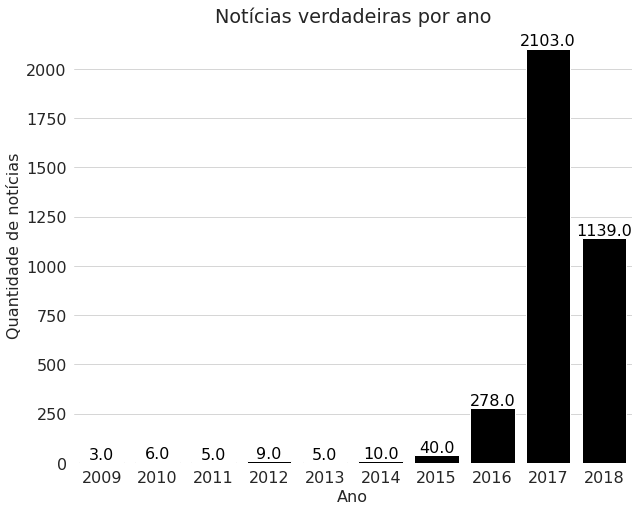

In [28]:
plt.subplots(figsize=(10, 8))
mlp.rc('font', family = 'Arial', size=16)
ax = sns.barplot(x="ano", y="count_label", data=df_true_label_y,
                hue_order="mes", color='black')
ax.set(frame_on=False)
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='edge',
    color='black'
)
plt.title("Notícias verdadeiras por ano")
plt.ylabel('Quantidade de notícias')
plt.xlabel('Ano')
plt.show()

In [29]:
# categoria com maior taxa de fake news
group_category_true = true.groupby('category').count().reset_index()
group_category_fake = fake.groupby('category').count().reset_index()


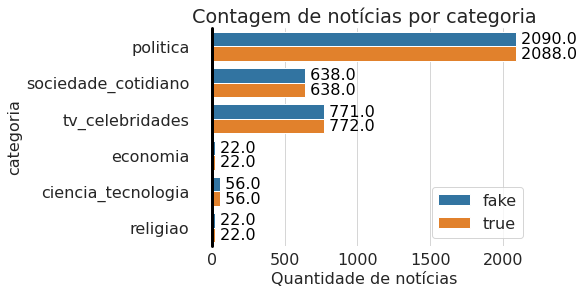

In [30]:
#plt.subplots(figsize=(10, 10))

ax = sns.countplot(data=data, y="category", hue='label')
ax.bar_label(
    ax.containers[0],
    fmt=' %.1f',
    label_type='edge',
    color='black'
)
ax.bar_label(
    ax.containers[1],
    fmt=' %.1f',
    label_type='edge',
    color='black'
)
ax.set(frame_on=False)
ax.axvline(-1, color="k",linewidth = 3, clip_on=False)
plt.legend(title='')
plt.title("Contagem de notícias por categoria")
plt.xlabel('Quantidade de notícias')
plt.ylabel('categoria')
plt.show()

In [31]:
true["tam_noticia"] = true["text"].apply(lambda x: len(x))
fake["tam_noticia"] = fake["text"].apply(lambda x: len(x))

/tmp/ipykernel_16518/2783698958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true["tam_noticia"] = true["text"].apply(lambda x: len(x))
/tmp/ipykernel_16518/2783698958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake["tam_noticia"] = fake["text"].apply(lambda x: len(x))


In [32]:
true.describe()

,tam_noticia
count,3598.000000
mean,6671.693719
std,4132.980976
min,114.000000
25%,3870.750000
50%,5578.500000
75%,8587.000000
max,46084.000000


In [33]:
fake.describe()

,tam_noticia
count,3599.000000
mean,1124.333704
std,769.460511
min,46.000000
25%,696.500000
50%,956.000000
75%,1356.000000
max,13280.000000


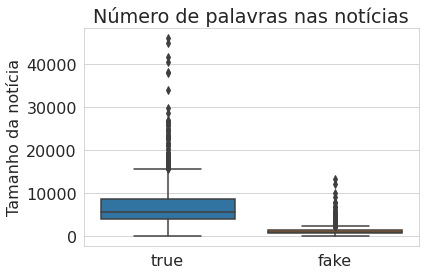

In [52]:
# média de palavras por tipo de noticias
sns.boxplot(data=pd.concat([true,fake]), x="label", y="tam_noticia")
plt.ylabel('Tamanho da notícia')
plt.xlabel('')
plt.title('Número de palavras nas notícias')
plt.show();

abaixo faremos um contador de palavras

In [35]:
fake.head(1)

,text,datetime,category,label,date,date_new,clean_text,tam_noticia
0,Chargista mais famoso do país aconselha Moro: ...,2017-06-11,politica,fake,11/06/2017,2017-11-06,chargista famoso país aconselha moro dá jeito ...,393


In [36]:
# palavras usadas com mais frequência nas fake ou true news
word2count_fake = {}
for data in fake.clean_text:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count_fake.keys():
            word2count_fake[word] = 1
        else:
            word2count_fake[word] += 1

word2count_true = {}
for data in true.clean_text:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count_true.keys():
            word2count_true[word] = 1
        else:
            word2count_true[word] += 1

In [37]:
import heapq
freq_words_fake = heapq.nlargest(10, word2count_fake, key=word2count_fake.get)
freq_words_true = heapq.nlargest(10, word2count_true, key=word2count_true.get)

In [38]:
num_f = []
num_t = []

In [39]:
for i in freq_words_fake:
    num_f.append(word2count_fake.get(i))

for i in freq_words_true:
    num_t.append(word2count_true.get(i))

In [40]:
d = {
    "nome": freq_words_fake,
    "frequencia":num_f
}

d_true = {
    "nome": freq_words_true,
    "frequencia":num_t
}

In [41]:
best_10_fake = pd.DataFrame(data=d)
best_10_true = pd.DataFrame(data=d_true)

In [42]:
best_10_fake

,nome,frequencia
0,lula,3055
1,disse,2200
2,dilma,1863
3,presidente,1844
4,brasil,1413
5,país,1234
6,governo,1195
7,temer,1183
8,federal,1177
9,sobre,1130


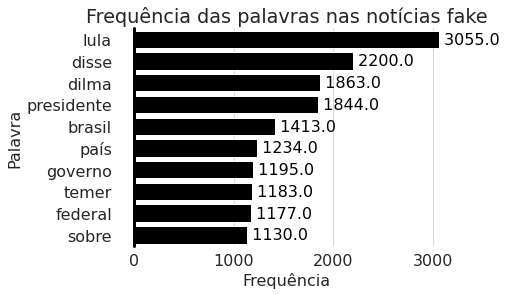

In [43]:
ax = sns.barplot(data=best_10_fake, x='frequencia', y='nome', color='black');
ax.bar_label(
    ax.containers[0],
    fmt=' %.1f',
    label_type='edge',
    color='black'
)
ax.set(frame_on=False)
ax.axvline(-1, color="k",linewidth = 3, clip_on=False)
plt.ylabel('Palavra')
plt.xlabel('Frequência')
plt.title('Frequência das palavras nas notícias fake')
plt.show();

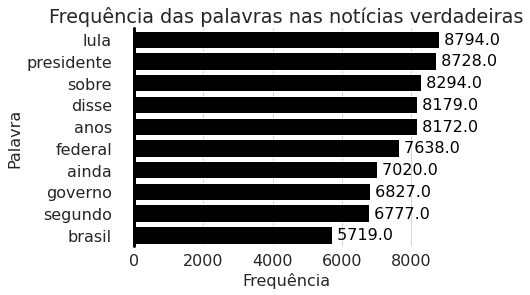

In [44]:
ax = sns.barplot(data=best_10_true, x='frequencia', y='nome', color='black');
ax.bar_label(
    ax.containers[0],
    fmt=' %.1f',
    label_type='edge',
    color='black'
)
ax.set(frame_on=False)
ax.axvline(-1, color="k",linewidth = 3, clip_on=False)
plt.ylabel('Palavra')
plt.xlabel('Frequência')
plt.title('Frequência das palavras nas notícias verdadeiras')
plt.show();

In [45]:
from wordcloud import WordCloud

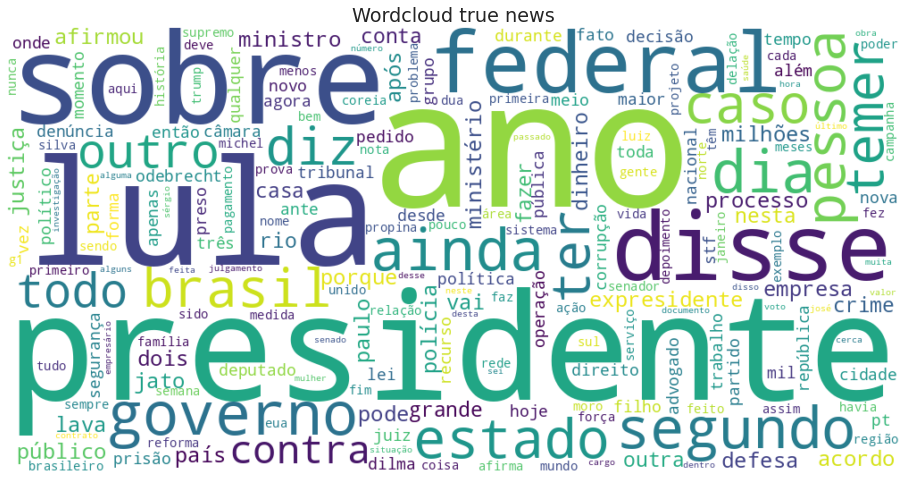

In [46]:
# formação de nuvem de palavras para as true news
text = " ".join(frase for frase in true.clean_text)
wordcloud = WordCloud(stopwords = stopwords,
                          collocations=False,
                          width=1000, height=500,
                          max_font_size=200, 
                          background_color='white').generate(text)

fig, ax = plt.subplots(figsize=(16,12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.title("Wordcloud true news")
plt.show()  

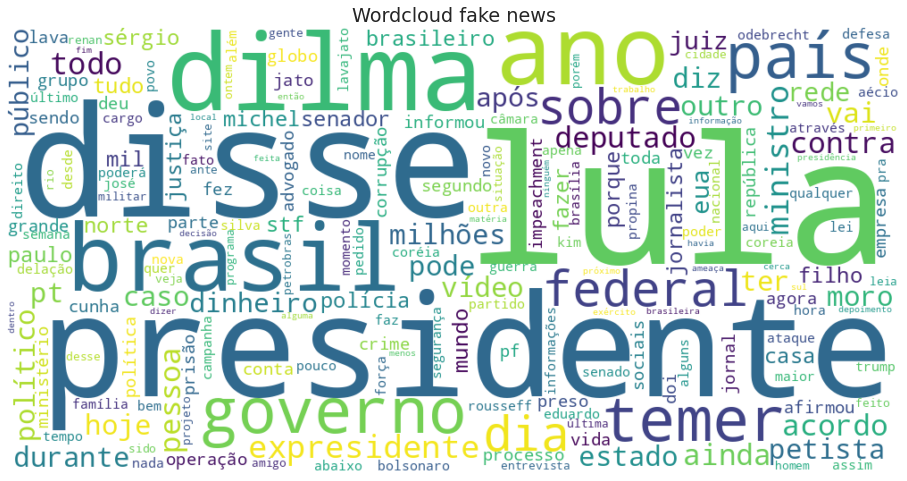

In [47]:
# formação de nuvem de palavras para as fake news
text = " ".join(frase for frase in fake.clean_text)
wordcloud = WordCloud(stopwords = stopwords,
                          collocations=False,
                          width=1000, height=500,
                          max_font_size=200, 
                          background_color='white').generate(text)

fig, ax = plt.subplots(figsize=(16,12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.title("Wordcloud fake news")
plt.show()

In [48]:
# import cv2
# import numpy as np

In [49]:
# imagem = cv2.imread("../data/raw/imgs/bolsonaro.png")
# rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
# gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
# ret,mask = cv2.threshold(gray,250,255,cv2.THRESH_BINARY)

In [50]:
# text = " ".join(frase for frase in fake.clean_text)
# wordcloud_fake = WordCloud(background_color="black",width=2000, height=800, mask=mask, collocations = False).generate(text)
# fig = plt.figure(figsize=(10,10))
# plt.imshow(wordcloud_fake, interpolation='bilinear')
# plt.title("De quem é essa fake news?????")
# plt.axis("off")
# plt.show()

## Descrição dos dados

O conjunto de dados possui 7200 instâncias e 4 colunas.
As colunas são as variáveis:
- **text**: referente ao texto da notícia, do tipo nominal;
- **datetime**: data da publicação das matérias, do tipo ordinal;
- **category**: assunto/tema da notícia trata, do tipo nominal;
- **label**: rótulo da notícia, se ela é falsa (fake) ou verdadeira (true), do tipo nominal;

Não há dados faltantes no dataframe.

## Perguntas de partida e hipóteses

Existe uma relação entre as fake news e a data?

Houve um período com mais fake news? Por que ele diminuiu ou aumentou?

Qual categoria apresenta maior quantidade de fake news?

Como se comparam as notícias em relação ao tamanho?

Quais são as palavras mais frequentes?

## Insights

Mensalmente podemos dizer que a taxa de fake news mais alta se encontra no mês 1 (Janeiro), já a maior taxa de true news se encontra no mês 3 (março). Anualmente, a maior taxa foi contabilizada em 2016, ano de eleição nos EUA, e em 2017, ano de eleição no Brasil. 
Em 2018, no entanto, tivemos uma queda significativa provavelmente devido a descoberta do significado de fake news e como consequencia, diversos portais alertaram a população sobre como identificar fake news, além de diversos sites que fazem isso automaticamente apenas com link da notícia ou com a manchete.

A categoria com maior quantidade de fake news é a de **política**. A pequena diferença mostrada deve-se ao tratamento realizado no início da análise exploratória.

As médias de tamanho são 6676 e 1124 para true news e para fake news, respectivamente.
Já a mediana de 5584 para true news e de fake news é 696. Ou seja, uma notícia verdadeira é bem mais longa do que uma falsa, o que pode ser uma característica marcante para a distinção entre elas.

De acordo com a contagem e a nuvem de palavras, tanto nas fake quanto nas verdadeiras, a palavra campeã, a que mais aparece é o nome do ex-presidente Lula. Comparando as duas nuvens, podemos pensar que nesta sessão, o nome pode ter sido usado para "limpar" a fake news criada.
Outro ponto de discussão é que, nas notícias verdadeiras temos várias palavras como "ano, sobre, dia, outro". Seria aconselhável fazer um novo tratamento de dados retirando esses termos ou testar outras técnicas, como contagem com bigramas.